In [89]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats



In [90]:
df=pd.read_csv("bank_data.csv")

In [119]:
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,indicator_1000
0,2030,194,263.540,Level 0 Recovery,19,0,0
1,1150,486,416.090,Level 0 Recovery,25,1,0
2,380,527,429.350,Level 0 Recovery,27,0,0
3,1838,536,296.990,Level 0 Recovery,25,0,0
4,1995,541,346.385,Level 0 Recovery,34,0,0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [93]:
df.isnull().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [94]:
df.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


# Graphical exploratory data analysis

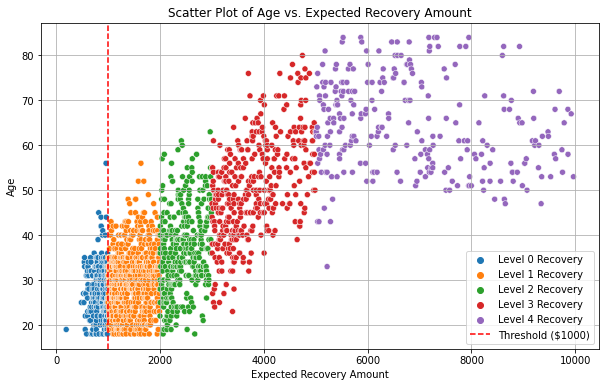

In [95]:
# Age vs. Expected Recovery Amount:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='expected_recovery_amount', y='age', data=df, hue='recovery_strategy')
plt.axvline(x=1000, color='red', linestyle='--', label='Threshold ($1000)')
plt.title('Scatter Plot of Age vs. Expected Recovery Amount')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()

In [96]:
mapp_age={'Male': 0, 'Female': 1}
df['sex']=df['sex'].map(mapp_age)

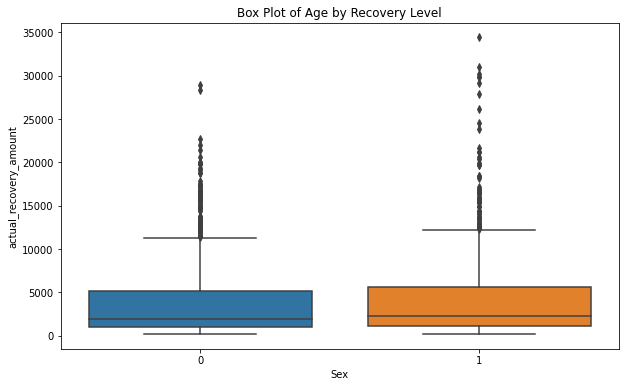

In [97]:
# Box Plot or Violin Plot:

plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='actual_recovery_amount', data=df)
plt.title('Box Plot of Age by Recovery Level')
plt.xlabel('Sex')
plt.ylabel('actual_recovery_amount')
plt.show()

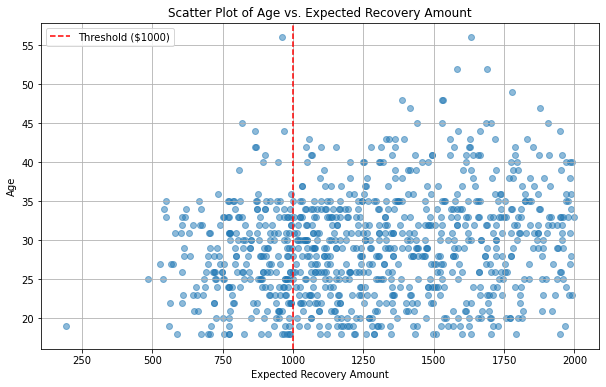

In [98]:
# Define the threshold values
threshold_lower = 0
threshold_upper = 2000

# Filter the data for the specified range of Expected Recovery Amount
filtered_data = df[(df['expected_recovery_amount'] >= threshold_lower) & (df['expected_recovery_amount'] <= threshold_upper)]

#scatter plot of age vs. Expected Recovery Amount
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['expected_recovery_amount'], filtered_data['age'], alpha=0.5)
plt.axvline(x=1000, color='red', linestyle='--', label='Threshold ($1000)')
plt.title('Scatter Plot of Age vs. Expected Recovery Amount')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()

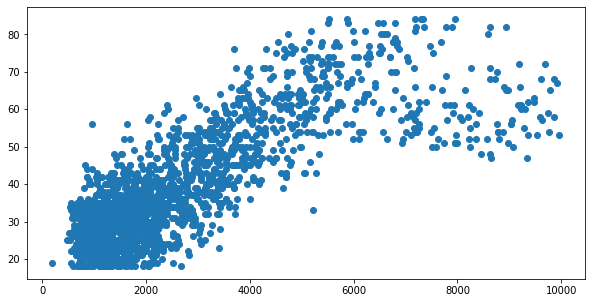

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(df['expected_recovery_amount'],df['age'])
plt.show()

In [99]:
# Statistical test: age vs. expected recovery amount

a = df.loc[(df['expected_recovery_amount']<1100) & (df['expected_recovery_amount']>=900)]
# by_recovery_strategy = era_900_1100.groupby(['recovery_strategy'])
# by_recovery_strategy['age'].describe().unstack()

# Perform Kruskal-Wallis test
Level_0_age = a.loc[df['recovery_strategy']=="Level 0 Recovery"]['age']
Level_1_age = a.loc[df['recovery_strategy']=="Level 1 Recovery"]['age']
stats.kruskal(Level_0_age, Level_1_age)

KruskalResult(statistic=3.4572342749517513, pvalue=0.06297556896097407)

In [120]:
# Statistical test: age vs. expected recovery amount

fil = df.loc[(df['expected_recovery_amount']<1100) &
                      (df['expected_recovery_amount']>=900)]
by_recovery_strategy = fil.groupby(['recovery_strategy'])
by_recovery_strategy['age'].describe().unstack()

# Perform Kruskal-Wallis test
Level_0_age = fil.loc[df['recovery_strategy']=="Level 0 Recovery"]['age']
Level_1_age = fil.loc[df['recovery_strategy']=="Level 1 Recovery"]['age']
stats.kruskal(Level_0_age, Level_1_age)

KruskalResult(statistic=3.4572342749517513, pvalue=0.06297556896097407)

In [100]:
# Statistical test: sex vs. expected recovery amount
# Number of customers in each category
crosstab = pd.crosstab(df.loc[(df['expected_recovery_amount']<2000) &
                              (df['expected_recovery_amount']>=0) ]['recovery_strategy'],
                       df['sex'])
print(crosstab)

# Chi-square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(crosstab)
print(p_val)

sex                  0    1
recovery_strategy          
Level 0 Recovery   139  108
Level 1 Recovery   354  316
0.3941650543686612


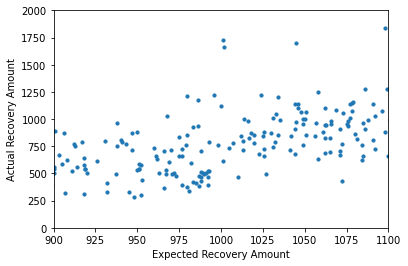

In [109]:
# Exploratory graphical analysis: recovery amount

plt.scatter(x=df['expected_recovery_amount'], y=df['actual_recovery_amount'], s=10)
plt.xlim(900, 1100)
plt.ylim(0, 2000)
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.show()

In [111]:
# Statistical analysis: recovery amount

# Perform Kruskal-Wallis test
Level_0_actual = df.loc[df['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = df.loc[df['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
print(stats.kruskal(Level_0_actual, Level_1_actual))

# Repeat for a smaller range of $950 to $1050
c = df.loc[(df['expected_recovery_amount']<1050) &
                      (df['expected_recovery_amount']>=950)]
Level_0_actual = c.loc[df['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = c.loc[df['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
stats.kruskal(Level_0_actual, Level_1_actual)

KruskalResult(statistic=466.10256560335574, pvalue=2.2588447433343195e-103)


KruskalResult(statistic=30.246000000000038, pvalue=3.80575314300276e-08)

#  Regression modeling: no threshold

In [113]:
#  Regression modeling: no threshold


import statsmodels.api as sm
a = df.loc[(df['expected_recovery_amount']<1100) &
                      (df['expected_recovery_amount']>=900)]
# Define X and y
X = a[['expected_recovery_amount']]
X = sm.add_constant(X) 
y = a['actual_recovery_amount']

# Build linear regression model
model = sm.OLS(y, X).fit()

# Print out the model summary statistics
print(model.summary())


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Sat, 07 Oct 2023   Prob (F-statistic):           1.56e-13
Time:                            18:55:14   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [114]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define your dataset 'a' as before
a = df.loc[(df['expected_recovery_amount'] < 1100) &
           (df['expected_recovery_amount'] >= 900)]

# Define X and y
X = a[['expected_recovery_amount']]
y = a['actual_recovery_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics (e.g., Mean Squared Error and R-squared)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 80733.42
R-squared: -0.19


# Regression modeling: adding true threshold

In [115]:
# Create indicator (0 or 1) for expected recovery amount >= $1000
df['indicator_1000'] = np.where(df['expected_recovery_amount']<1000, 0, 1)
era_900_1100 = df.loc[(df['expected_recovery_amount']<1100) &
                      (df['expected_recovery_amount']>=900)]

# Define X and y
X = era_900_1100['expected_recovery_amount']
y = era_900_1100['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Sat, 07 Oct 2023   Prob (F-statistic):           1.56e-13
Time:                            18:59:53   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1978.7597    347.741     -5.690      0.000   -2664.907   -1292.612
expected_recovery_amount     2.7577      0.345      7.986      0.000       2.076       3.439
==============================================================================
Omnibus:                       64.493   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.818
Skew:                           1.463   Prob(JB):                     4.47e-41
Kurtosis:                       6.977   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
# Create indicator (0 or 1) for expected recovery amount >= $1000
df['indicator_1000'] = np.where(df['expected_recovery_amount'] < 1000, 0, 1)
era_900_1100 = df.loc[(df['expected_recovery_amount'] < 1100) &
                      (df['expected_recovery_amount'] >= 900)]

# Define X and y
X = era_900_1100[['expected_recovery_amount']]
y = era_900_1100['actual_recovery_amount']

# Split the data into training and testing sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 80733.42394653316
R-squared: -0.19195440789468998


# Regression modeling: adjusting the window

In [117]:
# Redefine era_950_1050 so the indicator variable is included
window = df.loc[(df['expected_recovery_amount']<1050) &
                      (df['expected_recovery_amount']>=950)]

# Define X and y
X = window[['expected_recovery_amount','indicator_1000']]
y = window['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.269
Method:                     Least Squares   F-statistic:                     18.99
Date:                    Sat, 07 Oct 2023   Prob (F-statistic):           1.12e-07
Time:                            19:02:18   Log-Likelihood:                -692.92
No. Observations:                      99   AIC:                             1392.
Df Residuals:                          96   BIC:                             1400.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -279.5243   1840.707     -0.152      0.880   -3933.298    3374.250
expected_recovery_amount     0.9189      1.886      0.487      0.627      -2.825       4.663
indicator_1000             286.5337    111.352      2.573      0.012      65.502     507.566
==============================================================================
Omnibus:                       39.302   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.258
Skew:                           1.564   Prob(JB):                     1.37e-18
Kurtosis:                       6.186   Cond. No.                     6.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:


# Redefine era_950_1050 so the indicator variable is included
window = df.loc[(df['expected_recovery_amount'] < 1050) &
                      (df['expected_recovery_amount'] >= 950)]

# Define X and y
X = window[['expected_recovery_amount', 'indicator_1000']]
y = window['actual_recovery_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 60938.33581844183
R-squared: -0.6252851969812694
